In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from os import listdir

In [2]:
vet_pdr = []
all_df = pd.DataFrame()

for i, file in enumerate(listdir("passagens/")):
    df = pd.read_csv(f"passagens/{file}")
    df = df[df["PACKAGE"] > 0]
    df = df[df["PACKAGE"] < 100]
    vet_pdr.append(len(df["PACKAGE"]) / (df["PACKAGE"].max()+1) * 100)
    distance = file.rsplit("_")[-1]
    
    df[" RSSI"] = - (256 - df[" RSSI"])
    df = df.rename(columns={" RSSI": f"RSSI_{distance}"})
    df = df[f"RSSI_{distance}"].reset_index(drop=True)
    all_df = pd.concat([all_df, df], axis=1)
    
all_df = all_df.dropna(how="all").astype('float64')
all_df

,RSSI_50m,RSSI_100m,RSSI_150m,RSSI_200m,RSSI_250m,RSSI_300m,RSSI_350m,RSSI_400m,RSSI_450m,RSSI_500m,RSSI_550m,RSSI_600m,RSSI_650m,RSSI_700m,RSSI_700m+
0,-42.0,-60.0,-78.0,-70.0,-77.0,-77.0,-87.0,-94.0,-89.0,-82.0,-86.0,-81.0,-80.0,-90.0,-96.0
1,-41.0,-61.0,-69.0,-75.0,-72.0,-73.0,-78.0,-89.0,-90.0,-80.0,-83.0,-86.0,-81.0,-93.0,-91.0
2,-39.0,-66.0,-67.0,-87.0,-72.0,-75.0,-72.0,-92.0,-88.0,-80.0,-84.0,-87.0,-80.0,-92.0,-93.0
3,-39.0,-54.0,-65.0,-73.0,-73.0,-81.0,-71.0,-93.0,-91.0,-80.0,-86.0,-85.0,-80.0,-89.0,-94.0
4,-40.0,-55.0,-76.0,-75.0,-72.0,-82.0,-70.0,-93.0,-86.0,-80.0,-84.0,-83.0,-80.0,-96.0,-86.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-85.0,NaN,-84.0,NaN,NaN,NaN,NaN
62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-88.0,NaN,NaN,NaN,NaN
63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-82.0,NaN,NaN,NaN,NaN
64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-84.0,NaN,NaN,NaN,NaN


C:\Users\lucas\AppData\Local\Temp\ipykernel_22908\4286386754.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([all_df[col].dropna() for col in all_df.columns], labels=labels)


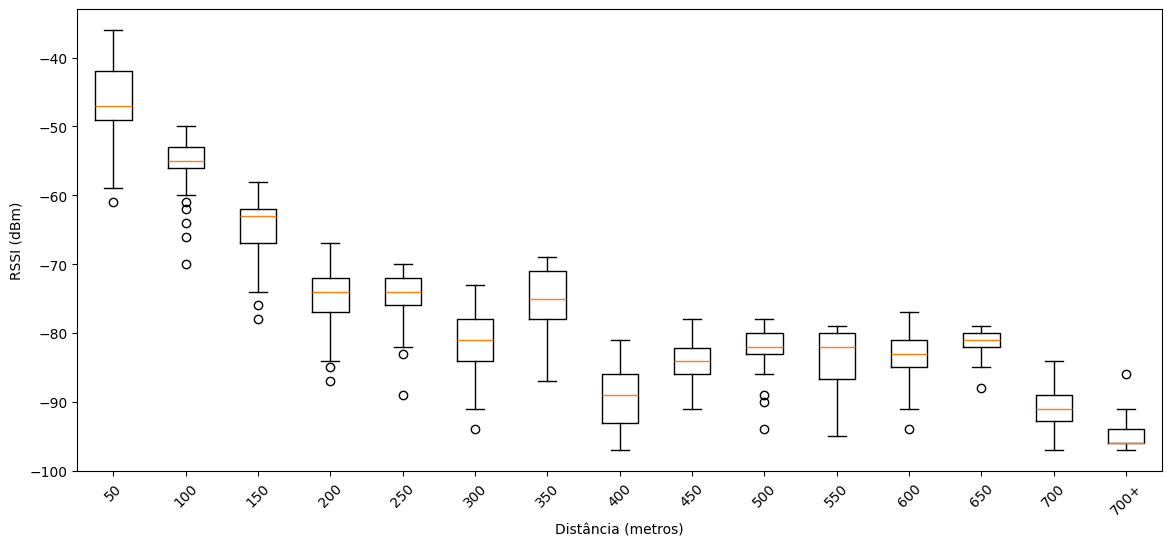

In [3]:
labels = [col.replace("RSSI_", "") for col in all_df.columns]
labels = [label.replace("m", "") for label in labels]

plt.figure(figsize=(14,6))
plt.boxplot([all_df[col].dropna() for col in all_df.columns], labels=labels)
plt.xticks(rotation=45)
plt.ylabel("RSSI (dBm)")
plt.xlabel("Distância (metros)")
plt.show()

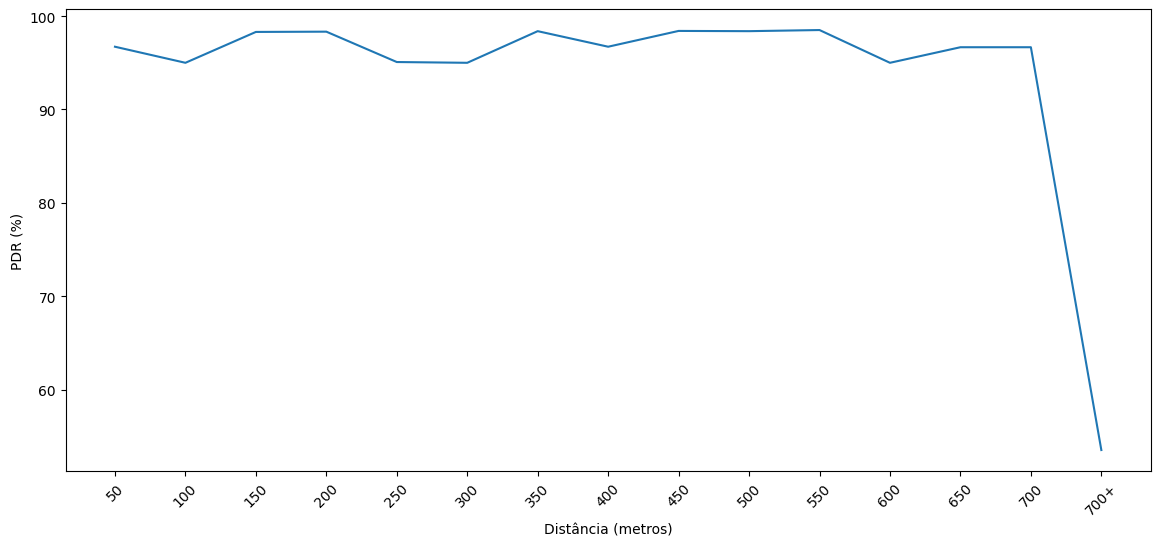

In [4]:
plt.figure(figsize=(14,6))
plt.plot(labels, vet_pdr)
plt.xticks(rotation=45)
plt.ylabel("PDR (%)")
plt.xlabel("Distância (metros)")
plt.show()